# Import Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Loads Dataset


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Normalize pixel values


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten for NN


In [4]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Reshape for CNN


In [5]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding for classification report / AUC


In [6]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build & Train NN


In [24]:
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_nn = nn_model.fit(x_train_flat, y_train_cat, epochs=20, validation_split=0.1, batch_size=64, verbose=2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 - 3s - 3ms/step - accuracy: 0.8143 - loss: 0.5300 - val_accuracy: 0.8467 - val_loss: 0.4264
Epoch 2/20
844/844 - 2s - 2ms/step - accuracy: 0.8628 - loss: 0.3822 - val_accuracy: 0.8648 - val_loss: 0.3805
Epoch 3/20
844/844 - 2s - 3ms/step - accuracy: 0.8764 - loss: 0.3409 - val_accuracy: 0.8712 - val_loss: 0.3620
Epoch 4/20
844/844 - 3s - 3ms/step - accuracy: 0.8826 - loss: 0.3168 - val_accuracy: 0.8790 - val_loss: 0.3257
Epoch 5/20
844/844 - 3s - 3ms/step - accuracy: 0.8902 - loss: 0.2982 - val_accuracy: 0.8693 - val_loss: 0.3686
Epoch 6/20
844/844 - 2s - 3ms/step - accuracy: 0.8974 - loss: 0.2789 - val_accuracy: 0.8840 - val_loss: 0.3255
Epoch 7/20
844/844 - 2s - 2ms/step - accuracy: 0.8986 - loss: 0.2721 - val_accuracy: 0.8892 - val_loss: 0.3093
Epoch 8/20
844/844 - 2s - 2ms/step - accuracy: 0.9024 - loss: 0.2596 - val_accuracy: 0.8855 - val_loss: 0.3221
Epoch 9/20
844/844 - 2s - 2ms/step - accuracy: 0.9071 - loss: 0.2490 - val_accuracy: 0.8865 - val_loss: 0.3155
Epoch 10/20


# Evaluate NN


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8887 - loss: 0.3612
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step

🧠 Neural Network Test Accuracy: 0.8890
Classification Report (NN):
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.83      0.81      1000
           3       0.90      0.89      0.89      1000
           4       0.84      0.78      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.73      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix (NN):


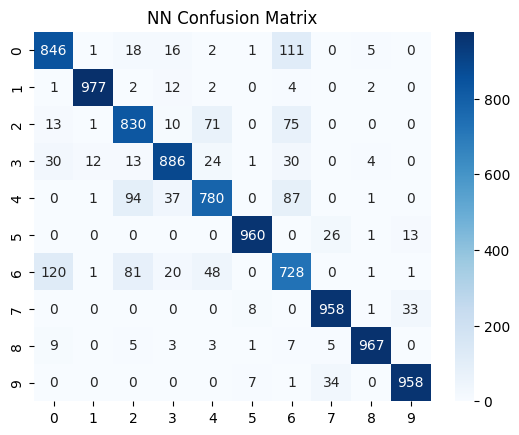

In [25]:
loss_nn, acc_nn = nn_model.evaluate(x_test_flat, y_test_cat)
y_pred_nn = np.argmax(nn_model.predict(x_test_flat), axis=1)

print(f"\n🧠 Neural Network Test Accuracy: {acc_nn:.4f}")
print("Classification Report (NN):\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix (NN):")
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Blues')
plt.title("NN Confusion Matrix")
plt.show()

# ROC Curve for NN (multi-class)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step


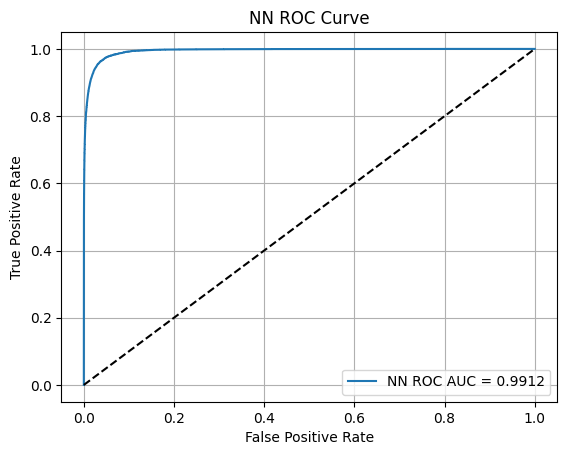

In [26]:
fpr_nn, tpr_nn, _ = roc_curve(y_test_cat.ravel(), nn_model.predict(x_test_flat).ravel())
plt.plot(fpr_nn, tpr_nn, label=f"NN ROC AUC = {roc_auc_score(y_test_cat, nn_model.predict(x_test_flat)):.4f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("NN ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Build & Train CNN


In [27]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(x_train_cnn, y_train_cat, epochs=30, validation_split=0.1, batch_size=64, verbose=2)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 - 25s - 29ms/step - accuracy: 0.8196 - loss: 0.5018 - val_accuracy: 0.8708 - val_loss: 0.3576
Epoch 2/30
844/844 - 40s - 47ms/step - accuracy: 0.8807 - loss: 0.3298 - val_accuracy: 0.8823 - val_loss: 0.3180
Epoch 3/30
844/844 - 23s - 27ms/step - accuracy: 0.8972 - loss: 0.2806 - val_accuracy: 0.8933 - val_loss: 0.2902
Epoch 4/30
844/844 - 23s - 28ms/step - accuracy: 0.9078 - loss: 0.2517 - val_accuracy: 0.9003 - val_loss: 0.2743
Epoch 5/30
844/844 - 40s - 48ms/step - accuracy: 0.9165 - loss: 0.2256 - val_accuracy: 0.8940 - val_loss: 0.2862
Epoch 6/30
844/844 - 23s - 27ms/step - accuracy: 0.9246 - loss: 0.2039 - val_accuracy: 0.9113 - val_loss: 0.2506
Epoch 7/30
844/844 - 23s - 27ms/step - accuracy: 0.9328 - loss: 0.1829 - val_accuracy: 0.9092 - val_loss: 0.2585
Epoch 8/30
844/844 - 23s - 27ms/step - accuracy: 0.9382 - loss: 0.1660 - val_accuracy: 0.9147 - val_loss: 0.2516
Epoch 9/30
844/844 - 41s - 49ms/step - accuracy: 0.9440 - loss: 0.1510 - val_accuracy: 0.9153 - val_loss: 0

# Evaluate CNN


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9093 - loss: 0.5242
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🧠 Convolutional Neural Network Test Accuracy: 0.9106
Classification Report (CNN):
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.86      0.86      1000
           3       0.92      0.91      0.91      1000
           4       0.86      0.87      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.75      0.75      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix (CNN):


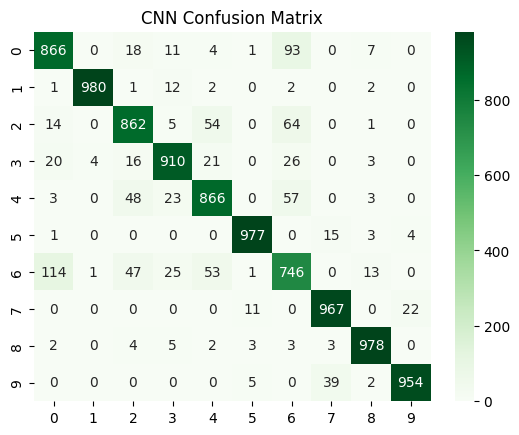

In [28]:
loss_cnn, acc_cnn = cnn_model.evaluate(x_test_cnn, y_test_cat)
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)

print(f"\n🧠 Convolutional Neural Network Test Accuracy: {acc_cnn:.4f}")
print("Classification Report (CNN):\n", classification_report(y_test, y_pred_cnn))
print("Confusion Matrix (CNN):")
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.show()


# ROC Curve for CNN (multi-class)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


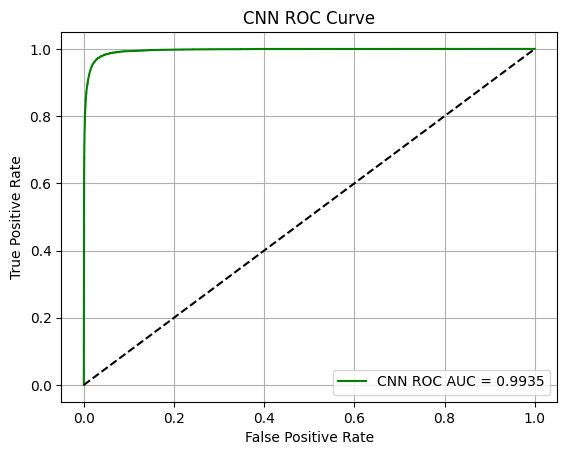

In [29]:
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cat.ravel(), cnn_model.predict(x_test_cnn).ravel())
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN ROC AUC = {roc_auc_score(y_test_cat, cnn_model.predict(x_test_cnn)):.4f}", color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CNN ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Plot Training History(NN & CNN)


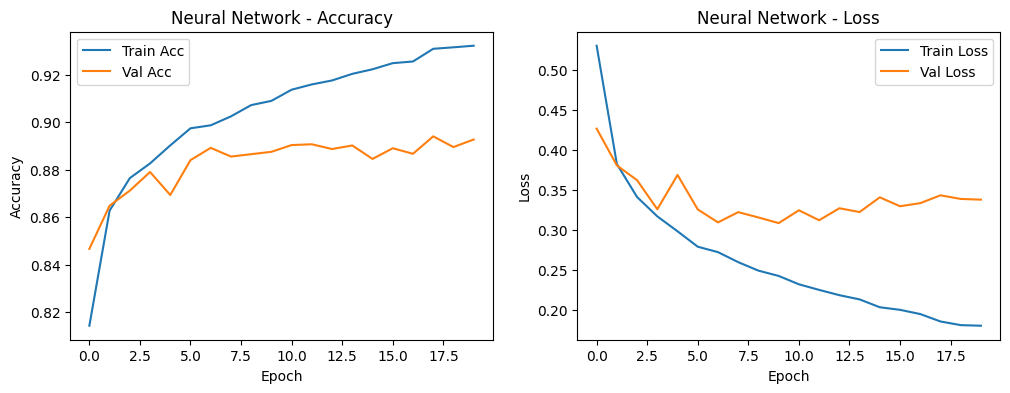

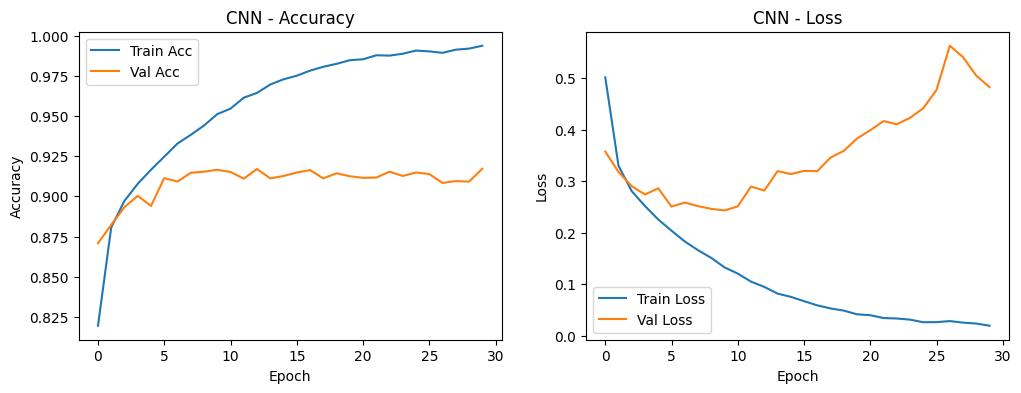

In [30]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_nn, "Neural Network")
plot_history(history_cnn, "CNN")


# Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


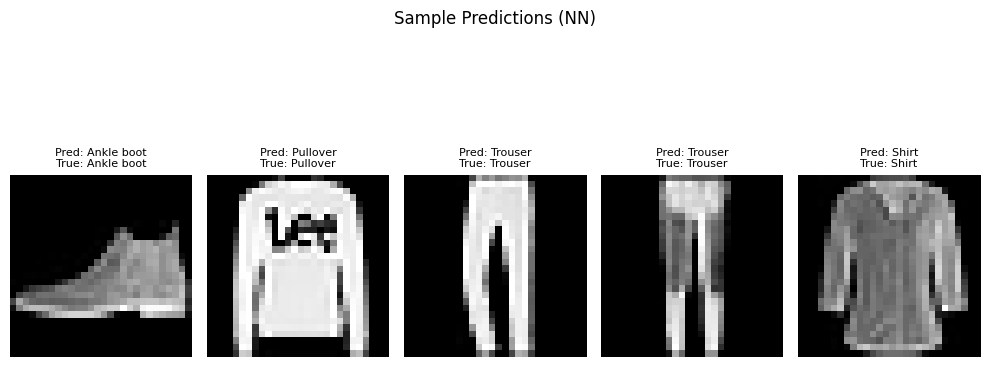

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


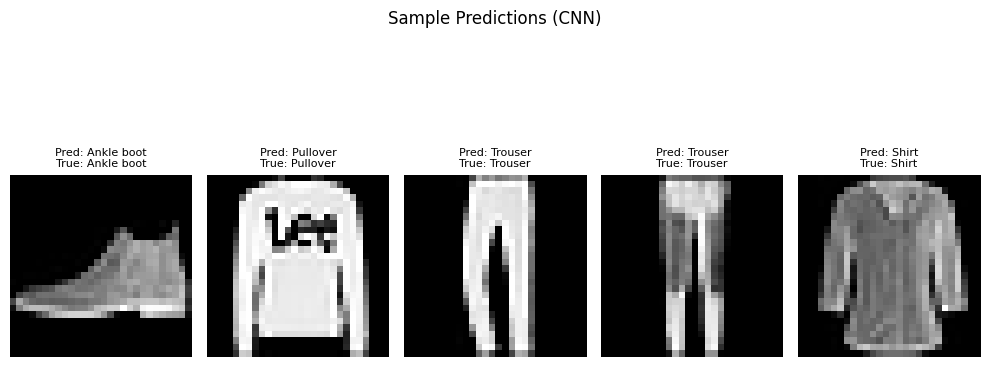

In [31]:
def plot_predictions(model, x_data, y_true, is_cnn=False):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        image = x_data[i]
        img_input = image.reshape(1, 28, 28, 1) if is_cnn else image.reshape(1, 784)
        pred = np.argmax(model.predict(img_input))
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_true[i]]}", fontsize=8)
        plt.axis('off')
    plt.suptitle("Sample Predictions" + (" (CNN)" if is_cnn else " (NN)"))
    plt.tight_layout()
    plt.show()

plot_predictions(nn_model, x_test, y_test, is_cnn=False)
plot_predictions(cnn_model, x_test, y_test, is_cnn=True)

# Accuracy of NN vs CNN


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


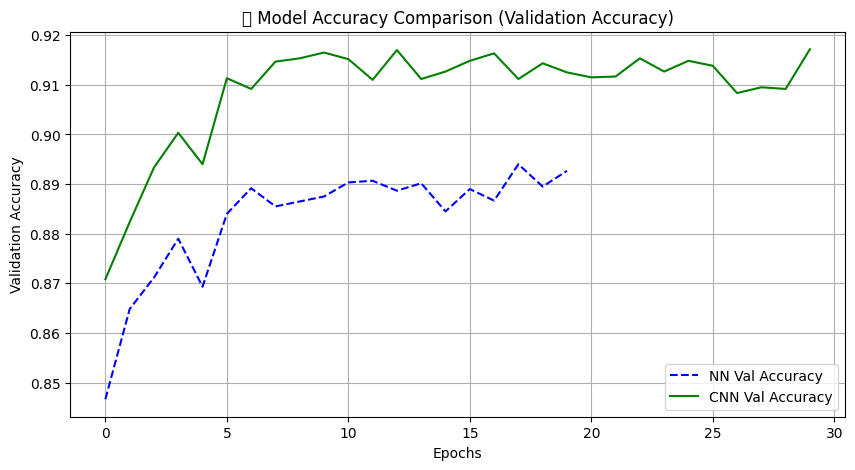

In [32]:
plt.figure(figsize=(10,5))
plt.plot(history_nn.history['val_accuracy'], label='NN Val Accuracy', linestyle='--', color='blue')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy', linestyle='-', color='green')
plt.title("📈 Model Accuracy Comparison (Validation Accuracy)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Predicted Probabilities


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


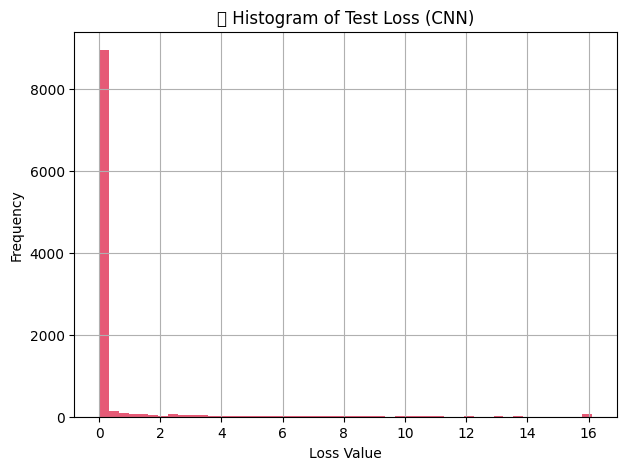

In [33]:
losses = tf.keras.losses.categorical_crossentropy(y_test_cat, cnn_model.predict(x_test_cnn)).numpy()

plt.figure(figsize=(7,5))
plt.hist(losses, bins=50, color='crimson', alpha=0.7)
plt.title("📊 Histogram of Test Loss (CNN)")
plt.xlabel("Loss Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Precision-Recall Curve (CNN)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


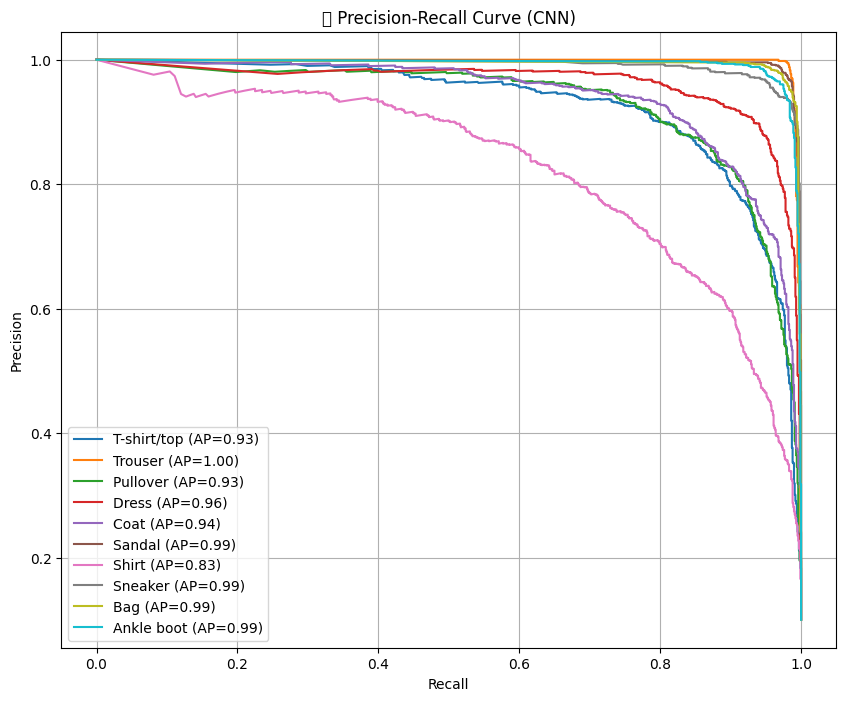

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_scores = cnn_model.predict(x_test_cnn)
plt.figure(figsize=(10, 8))
for i in range(10):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AP={ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('🔍 Precision-Recall Curve (CNN)')
plt.legend(loc='best')
plt.grid()
plt.show()


# Model Performance Comparison (Test Accuracy)

/tmp/ipython-input-35-1650903775.py:15: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


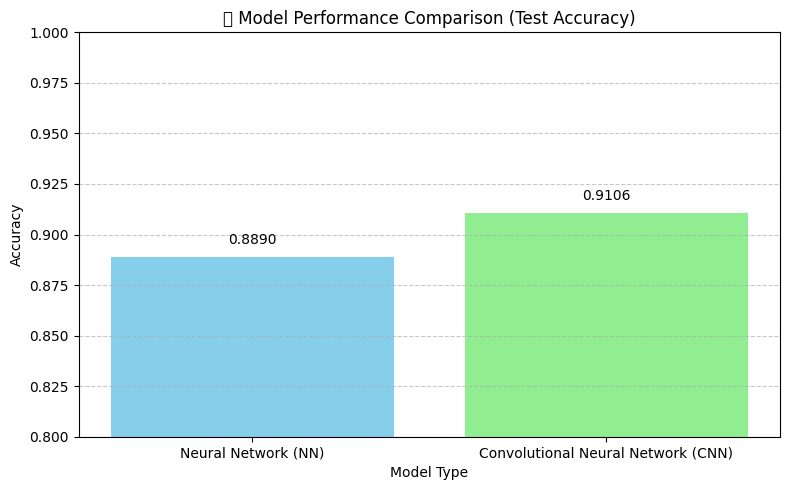

In [35]:
import matplotlib.pyplot as plt
model_names = ['Neural Network (NN)', 'Convolutional Neural Network (CNN)']
accuracies = [acc_nn, acc_cnn]  # Example: acc_nn = 0.88, acc_cnn = 0.93
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0.8, 1.0)
plt.title('🧠 Model Performance Comparison (Test Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Model Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005, f"{height:.4f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Final Comparison


In [36]:
print(f"\n🔍 Final Comparison:")
print(f"NN Test Accuracy  : {acc_nn:.4f}")
print(f"CNN Test Accuracy : {acc_cnn:.4f}")
print(f"✅ CNN performed better than NN by {(acc_cnn - acc_nn)*100:.2f}%")



🔍 Final Comparison:
NN Test Accuracy  : 0.8890
CNN Test Accuracy : 0.9106
✅ CNN performed better than NN by 2.16%
